<a href="https://colab.research.google.com/github/ChacoGolden/DSML_EV/blob/main/Graph_start_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [77]:
car_df = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/CH_vehicles_ev_percentage.csv')
pm10 = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/PM10_emissions_CH.csv')
no2 = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/No2_emissions_CH.csv')
co2 = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/CO2_carb_comb.csv')

In [79]:
co2.columns = ['year', 'carburants', 'combustibles', 'total']

In [80]:
co2.head()

,year,carburants,combustibles,total
0,1990,15.449183,23.408841,38.858024
1,1991,15.929118,23.250865,39.179983
2,1992,16.258574,23.848642,40.107216
3,1993,15.216857,22.655564,37.872420
4,1994,15.399493,22.930996,38.330490


In [81]:
# Step 1: Melt the wide dataframe into long format
clean_car_df = car_df.melt(id_vars='fuel_type', var_name='year', value_name='value')

# Step 2: Convert year to integer and standardize fuel_type
clean_car_df['year'] = clean_car_df['year'].astype(int)
clean_car_df['fuel_type'] = clean_car_df['fuel_type'].str.strip()

# Preview result
clean_car_df.head()

,fuel_type,year,value
0,Fossil,1990,3.773139e+06
1,Electricity,1990,3.690000e+03
2,% EV vs Fossil,1990,9.779656e-02
3,Fossil,1991,3.876153e+06
4,Electricity,1991,4.547000e+03


In [93]:
no2.rename(columns={no2.columns[1]: 'No2 ug/m3'}, inplace=True)


In [94]:
no2.head()

,date,No2 ug/m3
0,2000,49.2
1,2001,43.3
2,2002,47.0
3,2003,52.1
4,2004,48.0


In [95]:
pm10.rename(columns={pm10.columns[1]: 'Pm10 ug/m3'}, inplace=True)
pm10.head()

,date,Pm10 ug/m3
0,2000,NaN
1,2001,NaN
2,2002,36.9
3,2003,39.4
4,2004,33.4


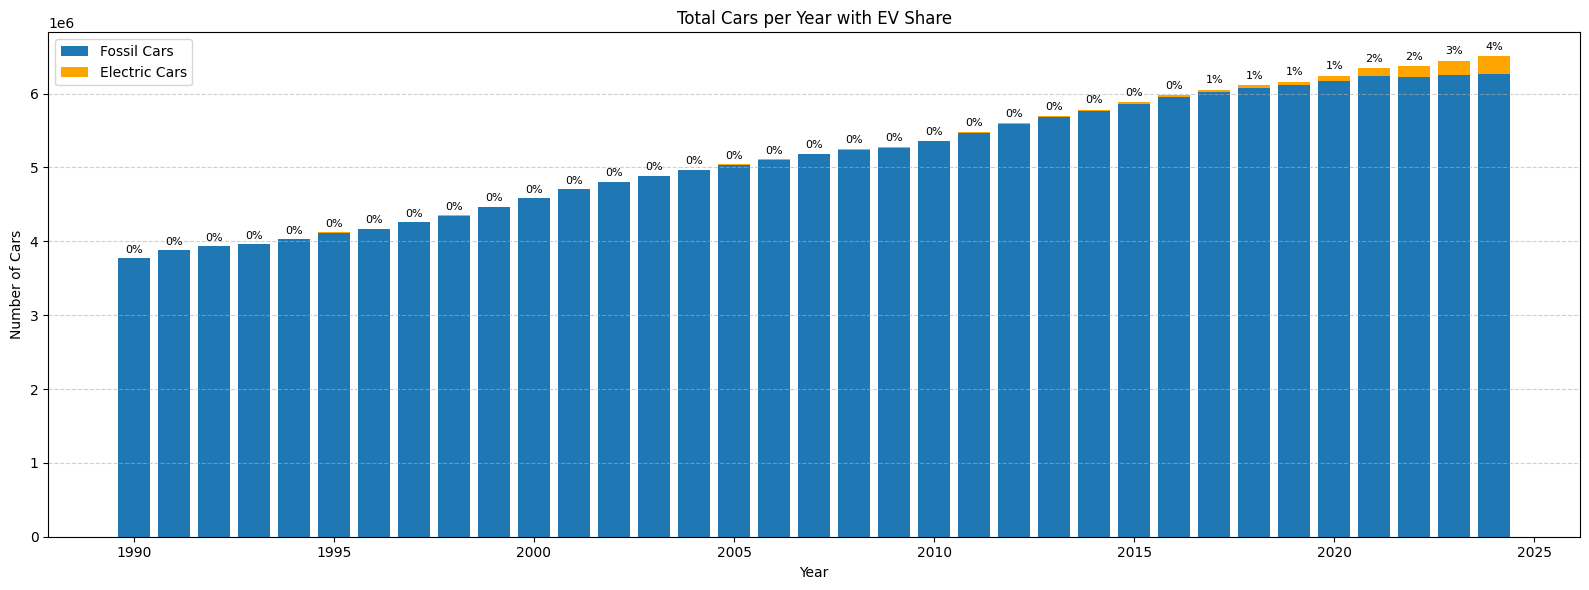

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Set 'fuel_type' as index
car_df_clean = car_df.set_index("fuel_type")

# Step 2: Drop the "% EV vs Fossil" row
car_data = car_df_clean.drop("% EV vs Fossil")

# Step 3: Transpose the data
df_transposed = car_data.T
df_transposed.columns = ["Fossil", "Electricity"]
df_transposed.index.name = "Year"
df_transposed = df_transposed.reset_index()
df_transposed["Year"] = df_transposed["Year"].astype(int)

# Step 4: Calculate EV share %
df_transposed["EV_share_pct"] = (df_transposed["Electricity"] /
                                 (df_transposed["Electricity"] + df_transposed["Fossil"])) * 100

# Step 5: Plot
plt.figure(figsize=(16, 6))
plt.bar(df_transposed["Year"], df_transposed["Fossil"], label="Fossil Cars")
plt.bar(df_transposed["Year"], df_transposed["Electricity"],
        bottom=df_transposed["Fossil"], label="Electric Cars", color="orange")

# Add % text labels above the bars
for i, row in df_transposed.iterrows():
    total_height = row["Fossil"] + row["Electricity"]
    pct = round(row["EV_share_pct"])
    plt.text(row["Year"], total_height + total_height * 0.01,  # slightly above the bar
             f"{pct}%", ha='center', va='bottom', fontsize=8)

plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.title("Total Cars per Year with EV Share")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


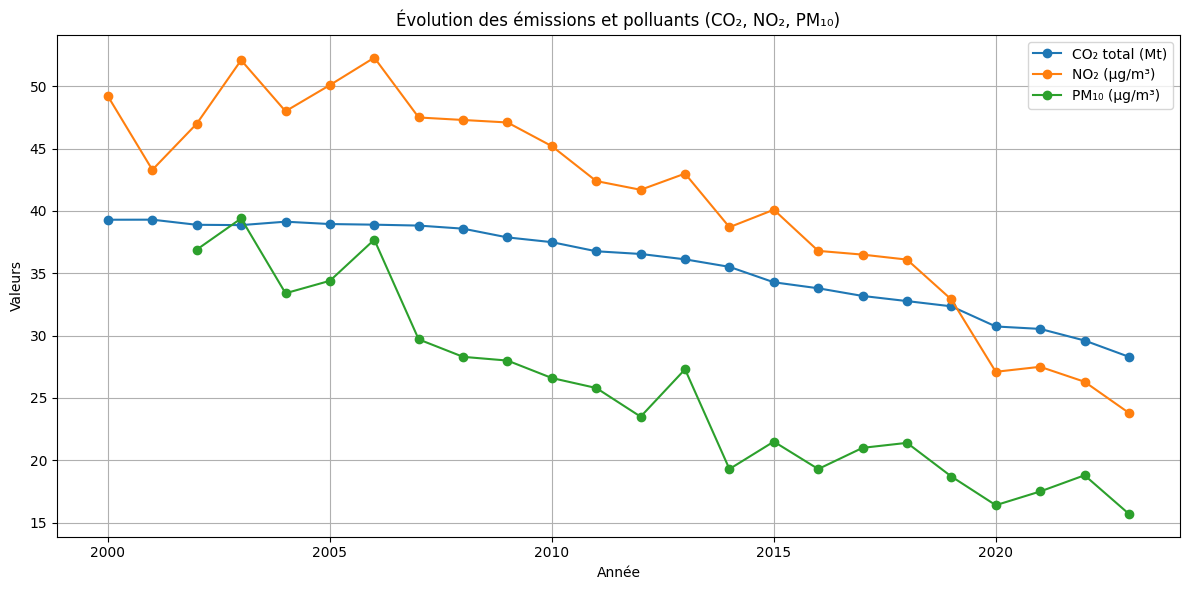

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Merge the data on the year/date
# Rename 'date' columns to 'year' for alignment
no2.rename(columns={'date': 'year'}, inplace=True)
pm10.rename(columns={'date': 'year'}, inplace=True)

# Merge the three datasets on 'year'
merged = co2[['year', 'total']].merge(no2, on='year').merge(pm10, on='year')

# Step 2: Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(merged['year'], merged['total'], label='CO₂ total (Mt)', marker='o')
plt.plot(merged['year'], merged['No2 ug/m3'], label='NO₂ (µg/m³)', marker='o')
plt.plot(merged['year'], merged['Pm10 ug/m3'], label='PM₁₀ (µg/m³)', marker='o')

# Formatting
plt.title("Évolution des émissions et polluants (CO₂, NO₂, PM₁₀)")
plt.xlabel("Année")
plt.ylabel("Valeurs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


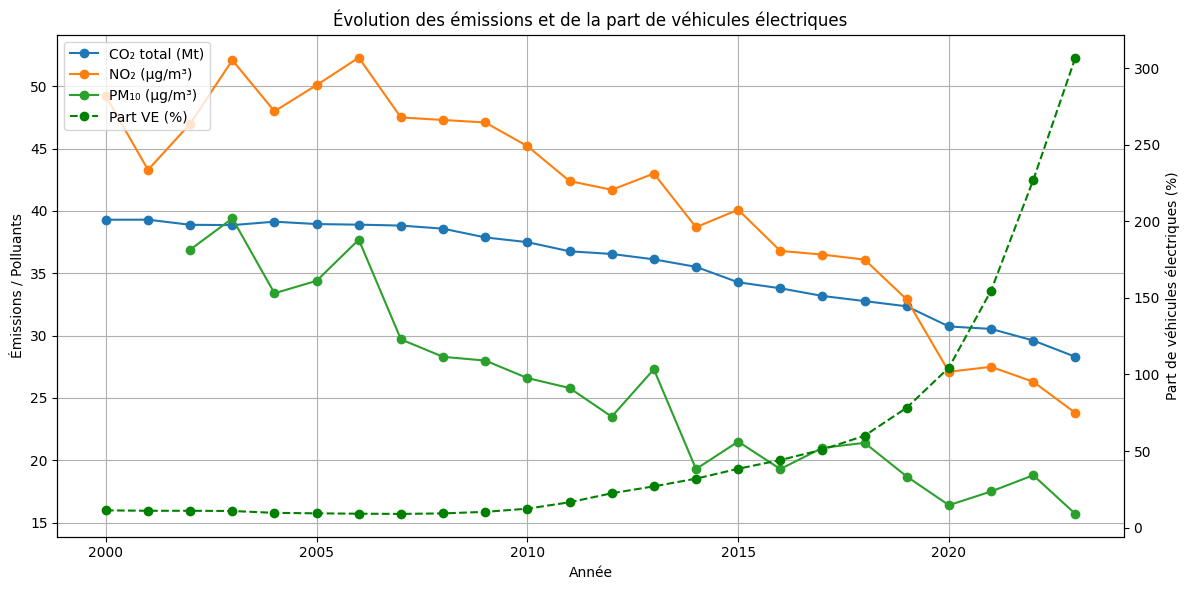

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names just in case
clean_car_df.columns = clean_car_df.columns.str.strip()

# Extract EV share data
ev_share_only = clean_car_df[clean_car_df['fuel_type'] == '% EV vs Fossil'][['year', 'value']]
ev_share_only.rename(columns={'value': 'EV_share'}, inplace=True)

# Rename 'date' columns to 'year'
no2.rename(columns={'date': 'year'}, inplace=True)
pm10.rename(columns={'date': 'year'}, inplace=True)

# Merge all datasets
merged = co2[['year', 'total']].merge(no2, on='year') \
                               .merge(pm10, on='year') \
                               .merge(ev_share_only, on='year')

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis: CO2, NO2, PM10
ax1.plot(merged['year'], merged['total'], label='CO₂ total (Mt)', marker='o')
ax1.plot(merged['year'], merged['No2 ug/m3'], label='NO₂ (µg/m³)', marker='o')
plt.plot(merged['year'], merged['Pm10 ug/m3'], label='PM₁₀ (µg/m³)', marker='o')
ax1.set_xlabel("Année")
ax1.set_ylabel("Émissions / Polluants")
ax1.grid(True)

# Create right y-axis for EV share
ax2 = ax1.twinx()
ax2.plot(merged['year'], merged['EV_share'] * 100, label='Part VE (%)', color='green', linestyle='--', marker='o')
ax2.set_ylabel("Part de véhicules électriques (%)")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Évolution des émissions et de la part de véhicules électriques")
plt.tight_layout()
plt.show()


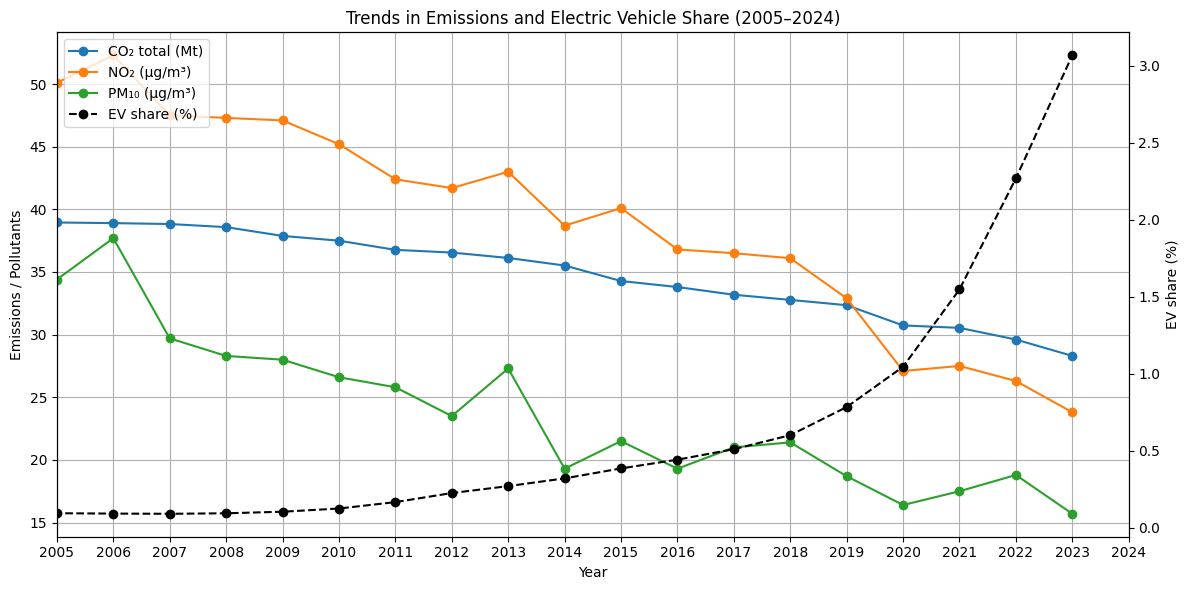

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names
clean_car_df.columns = clean_car_df.columns.str.strip()

# Extract EV share data (already in %)
ev_share_only = clean_car_df[clean_car_df['fuel_type'] == '% EV vs Fossil'][['year', 'value']]
ev_share_only.rename(columns={'value': 'EV_share'}, inplace=True)

# Standardize 'year' columns
no2.rename(columns={'date': 'year'}, inplace=True)
pm10.rename(columns={'date': 'year'}, inplace=True)

# Merge all data on 'year'
merged = co2[['year', 'total']].merge(no2, on='year') \
                               .merge(pm10, on='year') \
                               .merge(ev_share_only, on='year')

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: Emissions and pollutants
ax1.plot(merged['year'], merged['total'], label='CO₂ total (Mt)', marker='o')
ax1.plot(merged['year'], merged['No2 ug/m3'], label='NO₂ (µg/m³)', marker='o')
ax1.plot(merged['year'], merged['Pm10 ug/m3'], label='PM₁₀ (µg/m³)', marker='o')
ax1.set_xlabel("Year")
ax1.set_ylabel("Emissions / Pollutants")
ax1.set_xlim(2005, 2024)
ax1.set_xticks(range(2005, 2025))  # Only integer years
ax1.grid(True)

# Right Y-axis: EV share
ax2 = ax1.twinx()
ax2.plot(merged['year'], merged['EV_share'], label='EV share (%)', color='black', linestyle='--', marker='o')
ax2.set_ylabel("EV share (%)")

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Trends in Emissions and Electric Vehicle Share (2005–2024)")
plt.tight_layout()
plt.show()


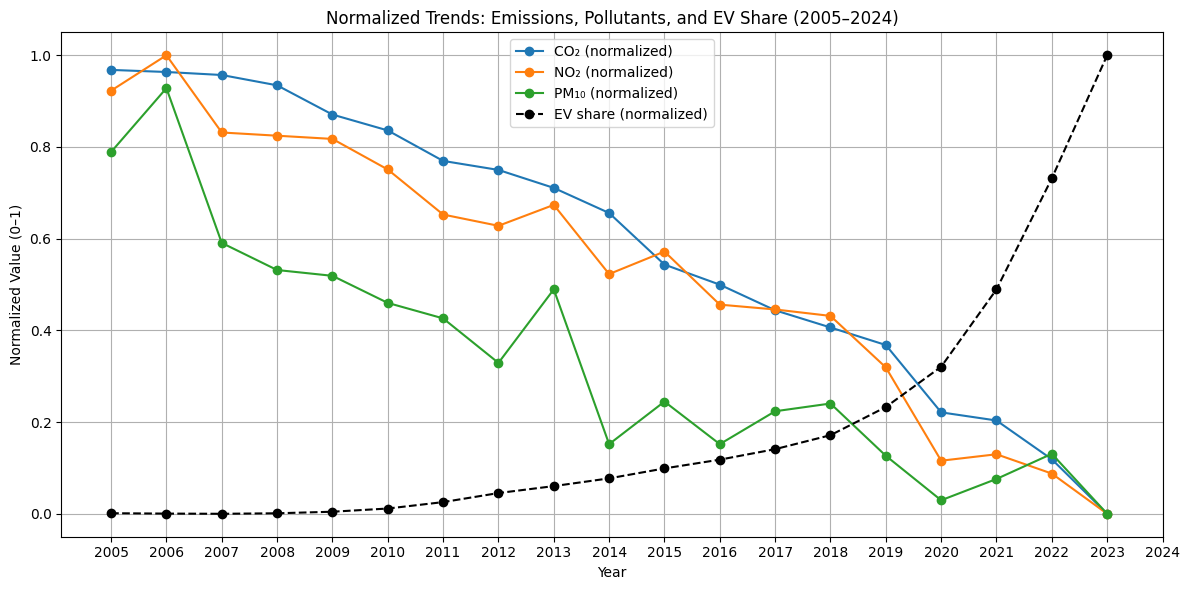

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names
clean_car_df.columns = clean_car_df.columns.str.strip()

# Extract and rename EV share
ev_share_only = clean_car_df[clean_car_df['fuel_type'] == '% EV vs Fossil'][['year', 'value']]
ev_share_only.rename(columns={'value': 'EV_share'}, inplace=True)

# Rename date to year for merging
no2.rename(columns={'date': 'year'}, inplace=True)
pm10.rename(columns={'date': 'year'}, inplace=True)

# Merge datasets
merged = co2[['year', 'total']].merge(no2, on='year') \
                               .merge(pm10, on='year') \
                               .merge(ev_share_only, on='year')

# Normalize all values using min-max scaling
merged['CO2_norm'] = (merged['total'] - merged['total'].min()) / (merged['total'].max() - merged['total'].min())
merged['NO2_norm'] = (merged['No2 ug/m3'] - merged['No2 ug/m3'].min()) / (merged['No2 ug/m3'].max() - merged['No2 ug/m3'].min())
merged['PM10_norm'] = (merged['Pm10 ug/m3'] - merged['Pm10 ug/m3'].min()) / (merged['Pm10 ug/m3'].max() - merged['Pm10 ug/m3'].min())
merged['EV_norm'] = (merged['EV_share'] - merged['EV_share'].min()) / (merged['EV_share'].max() - merged['EV_share'].min())

# Filter data for years 2005–2024
merged = merged[merged['year'].between(2005, 2024)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged['year'], merged['CO2_norm'], label='CO₂ (normalized)', marker='o')
plt.plot(merged['year'], merged['NO2_norm'], label='NO₂ (normalized)', marker='o')
plt.plot(merged['year'], merged['PM10_norm'], label='PM₁₀ (normalized)', marker='o')
plt.plot(merged['year'], merged['EV_norm'], label='EV share (normalized)', color='black', linestyle='--', marker='o')

# Formatting
plt.title("Normalized Trends: Emissions, Pollutants, and EV Share (2005–2024)")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0–1)")
plt.xticks(range(2005, 2025))  # Round years only
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()





In [119]:
# Create a DataFrame with only normalized columns
correlation_df = merged[['EV_norm', 'CO2_norm', 'NO2_norm', 'PM10_norm']]

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Display only correlations with EV
ev_correlations = correlation_matrix[['EV_norm']].drop('EV_norm')

print("Correlation of EV share with each pollutant/emission:")
print(ev_correlations)


Correlation of EV share with each pollutant/emission:
            EV_norm
CO2_norm  -0.871281
NO2_norm  -0.855695
PM10_norm -0.652598


In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract EV share from car_df
ev_share_only = car_df[car_df['fuel_type'] == '% EV vs Fossil'][['year', 'value']]
ev_share_only.rename(columns={'value': 'EV_share'}, inplace=True)

# Step 2: Standardize and merge all datasets on 'year'
no2.rename(columns={'date': 'year'}, inplace=True)
pm10.rename(columns={'date': 'year'}, inplace=True)

merged = co2[['year', 'total']].merge(no2, on='year') \
                               .merge(pm10, on='year') \
                               .merge(ev_share_only, on='year')

# Step 3: Plot trends including EV share
plt.figure(figsize=(12, 6))

plt.plot(merged['year'], merged['total'], label='CO₂ total (Mt)', marker='o')
plt.plot(merged['year'], merged['No2 ug/m3'], label='NO₂ (µg/m³)', marker='o')
plt.plot(merged['year'], merged['Pm10 ug/m³'], label='PM₁₀ (µg/m³)', marker='o')
plt.plot(merged['year'], merged['EV_share'] * 100, label='Part de véhicules électriques (%)', marker='o')

# Formatting
plt.title("Évolution des émissions et de la part de véhicules électriques")
plt.xlabel("Année")
plt.ylabel("Valeurs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['year', 'value'], dtype='object')] are in the [columns]"

In [ ]:
# Merge all three datasets
all_data = pd.merge(merged, co2_filtered, on='date', how='outer').sort_values('date')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(all_data['date'], all_data['PM10'], label='PM10 [µg/m³]', marker='o', color='green')
plt.plot(all_data['date'], all_data['NO2'], label='NO₂ [µg/m³]', marker='o', color='blue')
plt.plot(all_data['date'], all_data['co2_total'], label='CO₂ Total [Mt]', marker='o', color='red')

# Styling
plt.title('PM10, NO₂, and CO₂ Trends (2002–2024)')
plt.xlabel('Year')
plt.ylabel('Concentration / Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# --- Clean + Rename columns ---
pm10 = pm10.rename(columns={'PM10 [µg/m³]': 'PM10'})
no2 = no2.rename(columns={'NO2 [µg/m³]': 'NO2'})
co2 = co2.rename(columns={'Année': 'date', 'Emissions totale': 'CO2_total'})

In [ ]:
print(pm10.columns.tolist())  # Should show ['date', 'PM10']
# Normalize column names
pm10.columns = pm10.columns.str.strip().str.lower().str.replace('\xa0', ' ').str.replace('[^\w\s]', '', regex=True)
no2.columns = no2.columns.str.strip().str.lower().str.replace('\xa0', ' ').str.replace('[^\w\s]', '', regex=True)
co2.columns = co2.columns.str.strip().str.lower().str.replace('\xa0', ' ').str.replace('[^\w\s]', '', regex=True)

print(pm10.columns)  # Will be ['date', 'pm10 µgm3']



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Rename to standardize
co2 = co2.rename(columns={
    'Année': 'date',
    'Emissions totale': 'CO2_total'
})

# --- Clean + Rename columns ---
pm10 = pm10.rename(columns={'PM10 [µg/m³]': 'PM10'})
no2 = no2.rename(columns={'NO2 [µg/m³]': 'NO2'})
co2 = co2.rename(columns={'Année': 'date', 'Emissions totale': 'CO2_total'})

# --- Prepare EV share ---
ev_share = car_df[car_df['fuel_type'] == '% EV vs Fossil'].copy()
ev_share = ev_share.drop(columns='fuel_type').T.reset_index()
ev_share.columns = ['date', 'EV_share']
ev_share['date'] = ev_share['date'].astype(int)
ev_share['EV_share'] = ev_share['EV_share'] * 100  # convert to %

# --- Filter 2005–2024 ---
pm10 = pm10[(pm10['date'] >= 2005) & (pm10['date'] <= 2024)]
no2 = no2[(no2['date'] >= 2005) & (no2['date'] <= 2024)]
co2 = co2[(co2['date'] >= 2005) & (co2['date'] <= 2024)]
ev_share = ev_share[(ev_share['date'] >= 2005) & (ev_share['date'] <= 2024)]

# --- Merge all datasets on 'date' ---
merged = pd.merge(pm10, no2, on='date', how='outer')
merged = pd.merge(merged, co2[['date', 'CO2_total']], on='date', how='outer')
all_data = pd.merge(merged, ev_share, on='date', how='outer').sort_values('date')

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Main y-axis
ax1.plot(all_data['date'], all_data['PM10'], label='PM10 [µg/m³]', color='green', marker='o')
ax1.plot(all_data['date'], all_data['NO2'], label='NO₂ [µg/m³]', color='blue', marker='o')
ax1.plot(all_data['date'], all_data['CO2_total'], label='CO₂ Total [Mt]', color='red', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Pollution / Emissions')
ax1.legend(loc='upper left')
ax1.grid(True)

# Secondary y-axis for EV share
ax2 = ax1.twinx()
ax2.plot(all_data['date'], all_data['EV_share'], label='EV Share [%]', color='orange', linestyle='--', marker='x')
ax2.set_ylabel('EV Share [%]')
ax2.legend(loc='upper right')

plt.title('Trends (2005–2024): PM10, NO₂, CO₂, and EV Share')
plt.tight_layout()
plt.show()


In [ ]:
print(pm10.columns.tolist())
print(no2.columns.tolist())
print(co2.columns.tolist())


In [ ]:
import matplotlib.pyplot as plt

# Step 1: Clean and convert relevant columns
co2['Année'] = co2['Année'].astype(int)
co2['carburant'] = co2["Emissions liées aux carburants, en millions de tonnes de CO2"].astype(float)
co2['combustible'] = co2["Emissions liées aux combustibles, en millions de tonnes de CO2"].astype(float)

# Step 2: Filter years if needed (e.g., from 1990 to 2024)
co2_filtered = co2[(co2['Année'] >= 1990) & (co2['Année'] <= 2024)]

# Step 3: Plot stacked bar chart
plt.figure(figsize=(14, 7))
plt.bar(co2_filtered['Année'], co2_filtered['carburant'], label='Carburants')
plt.bar(co2_filtered['Année'], co2_filtered['combustible'],
        bottom=co2_filtered['carburant'], label='Combustibles')

# Styling
plt.title('Total CO₂ Emissions by Source (1990–2024)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Million Tonnes)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
